## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.metrics import r2_score

% matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5ee940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ed94f28>]], dtype=object)

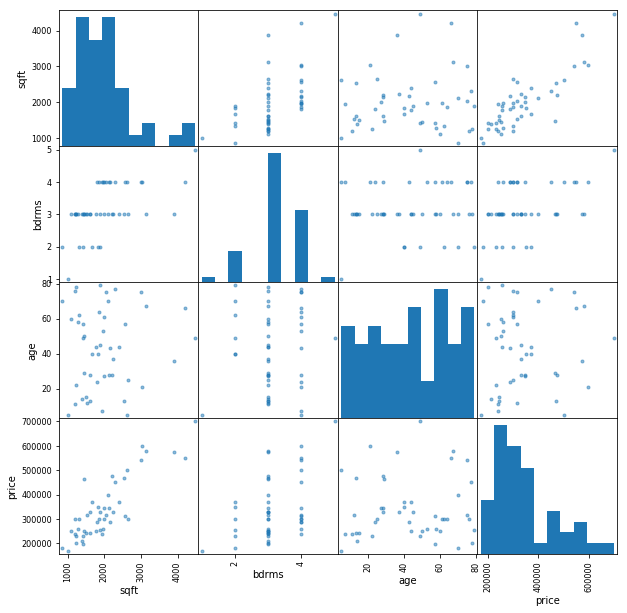

In [3]:
pd.tools.plotting.scatter_matrix(df, figsize=(10,10), diagonal='hist')

In [4]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## create the modelling function

In [16]:
def CreateRunModel(A, B, C, D, opt, lossfunc, epos, reg=None, callbacks=None, cvsplit = 0.0):

    model = Sequential()
    model.add(Dense(1, input_dim=3, kernel_regularizer = reg))
    model.compile(optimizer = opt, loss = lossfunc)
    print('The initial weights W are: \n', model.get_weights()[0])
    print('The initial bias b is: ', model.get_weights()[1])
    print('---------------------------------------------------------------')

    history = model.fit(A, B, validation_split = cvsplit, epochs = epos, verbose=0, callbacks = callbacks)

    print('The resulted weights W are: \n', model.get_weights()[0])
    print('The resulted bias b is: ', model.get_weights()[1])
    print('--------------------------- plot the loss function ------------------------------------')
    
    N_epo = len(history.history['loss'])
    plt.figure(figsize=(16,5))
    plt.plot(np.linspace(1, N_epo, N_epo), history.history['loss'], c='g', label='training set loss')
    if cvsplit > 0.:
        plt.plot(np.linspace(1, N_epo, N_epo), history.history['val_loss'], c='r', label='CV set loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
#     Nticks = N_epo+1 if(N_epo < 40) else 21
    plt.xticks(np.linspace(0, N_epo, N_epo+1 if(N_epo < 40) else 21))
    plt.legend()
    plt.grid()
    plt.show()
    print('----------------------------- R2 Score ----------------------------------')
    print("The training R2 score is {:0.3f}".format(r2_score(B, model.predict(A))))
    print("The test R2 score is {:0.3f}".format(r2_score(D, model.predict(C))))

    plt.scatter(A[:,0], model.predict(A), c='red', label='prediction')
    plt.scatter(A[:,0], B, c='blue', label='real')
    plt.grid()
    plt.show()

### 1. simplist model

The initial weights W are: 
 [[ 0.81614983]
 [-1.20603192]
 [ 0.31048942]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 158.33297729]
 [ 162.28466797]
 [ 163.70533752]]
The resulted bias b is:  [ 165.01107788]
--------------------------- plot the loss function ------------------------------------


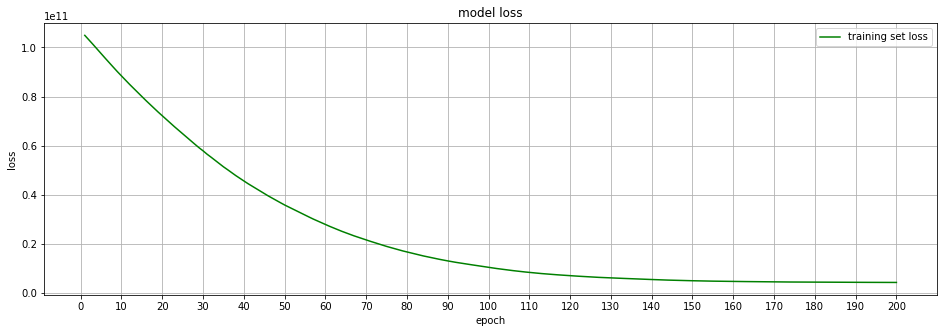

----------------------------- R2 Score ----------------------------------
The training R2 score is 0.564
The test R2 score is 0.671


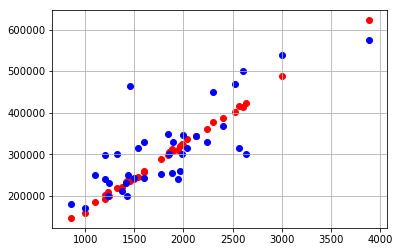

In [17]:
A = X_train
B = y_train
C = X_test
D = y_test

opt = Adam(lr=0.8)
lossfunc = 'mean_squared_error'
epos = 200
CreateRunModel(A, B, C, D, opt, lossfunc, epos)

### 2. try sgd instead

The initial weights W are: 
 [[ 0.67069483]
 [-0.45526403]
 [ 0.94829404]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ nan]
 [ nan]
 [ nan]]
The resulted bias b is:  [ nan]
--------------------------- plot the loss function ------------------------------------


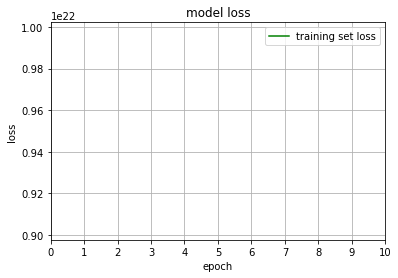

----------------------------- R2 Score ----------------------------------


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [14]:
A = X_train
B = y_train
C = X_test
D = y_test

opt = SGD(lr=0.1)
lossfunc = 'mean_squared_error'
epos = 10
CreateRunModel(A, B, C, D, opt, lossfunc, epos)

### 3 try feature normalization

/Users/apalumbo/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


The initial weights W are: 
 [[-1.11559606]
 [ 1.1162051 ]
 [-1.15563977]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 1628.67333984]
 [ 1166.35986328]
 [  -40.50664902]]
The resulted bias b is:  [ 3179.15991211]
--------------------------- plot the loss function ------------------------------------


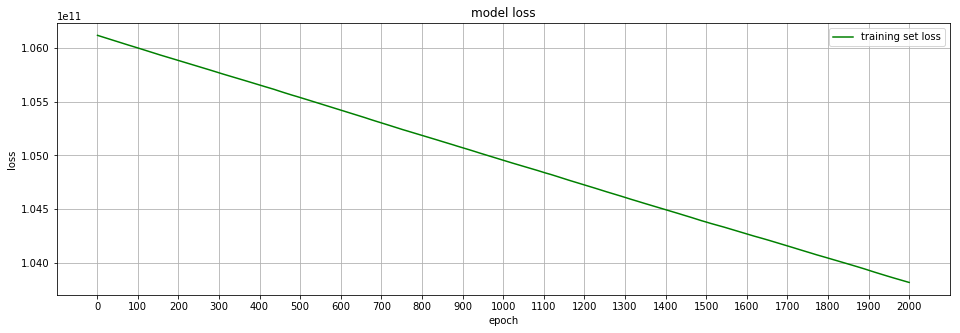

----------------------------- R2 Score ----------------------------------
The training R2 score is -9.826
The test R2 score is -9.335


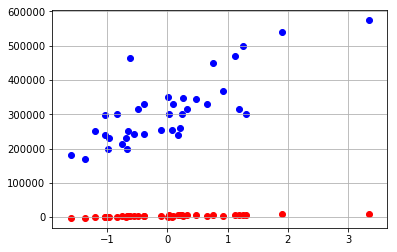

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

A = ss.fit_transform(X_train)
B = y_train
C = ss.transform(X_test)
D = y_test

opt = Adam(lr=0.8)
lossfunc = 'mean_squared_error'
epos = 2000
CreateRunModel(A, B, C, D, opt, lossfunc, epos)

### 5. try normalize y

/Users/apalumbo/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


The initial weights W are: 
 [[-0.46541226]
 [ 0.17388368]
 [ 0.68444908]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 0.77745026]
 [ 0.05049421]
 [-0.03533673]]
The resulted bias b is:  [ 3.10705471]
--------------------------- plot the loss function ------------------------------------


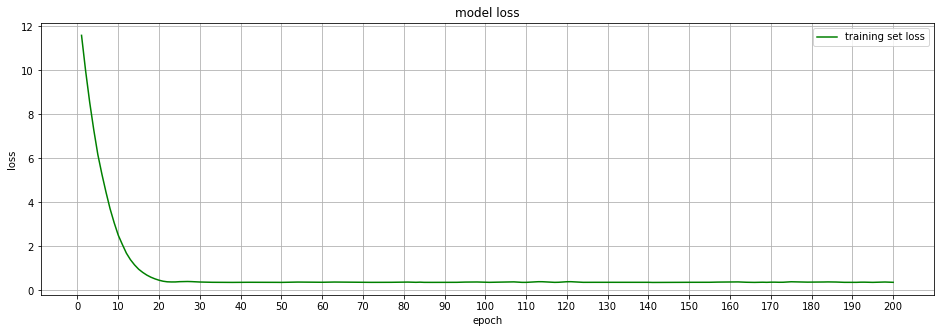

----------------------------- R2 Score ----------------------------------
The training R2 score is 0.620
The test R2 score is 0.689


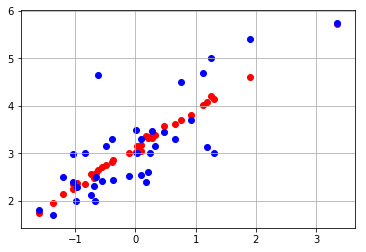

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

A = ss.fit_transform(X_train)
B = y_train/1e5
C = ss.transform(X_test)
D = y_test/1e5

opt = Adam(lr=0.1)
lossfunc = 'mean_squared_error'
epos = 200
CreateRunModel(A, B, C, D, opt, lossfunc, epos)

### use minmaxscaler instead

/Users/apalumbo/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


The initial weights W are: 
 [[-1.15518999]
 [-0.31235915]
 [ 0.95449603]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 3.10145688]
 [ 0.79826379]
 [-0.01471595]]
The resulted bias b is:  [ 1.70356882]
--------------------------- plot the loss function ------------------------------------


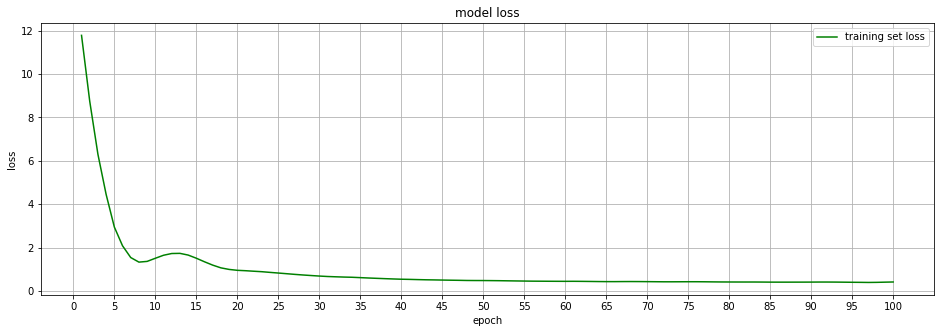

----------------------------- R2 Score ----------------------------------
The training R2 score is 0.570
The test R2 score is 0.654


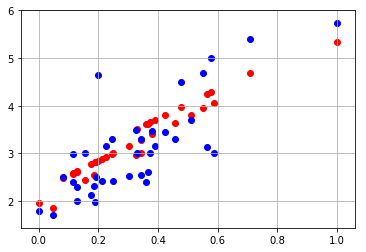

In [32]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

A = mm.fit_transform(X_train)
B = y_train/1e5
C = mm.transform(X_test)
D = y_test/1e5

opt = Adam(lr=0.1)
lossfunc = 'mean_squared_error'
epos = 100
CreateRunModel(A, B, C, D, opt, lossfunc, epos)

### use SGD after feature normalization

/Users/apalumbo/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


The initial weights W are: 
 [[ 1.15687859]
 [ 0.09458673]
 [-0.98701447]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 3.04019165]
 [ 0.58827502]
 [-0.0123903 ]]
The resulted bias b is:  [ 1.73518944]
--------------------------- plot the loss function ------------------------------------


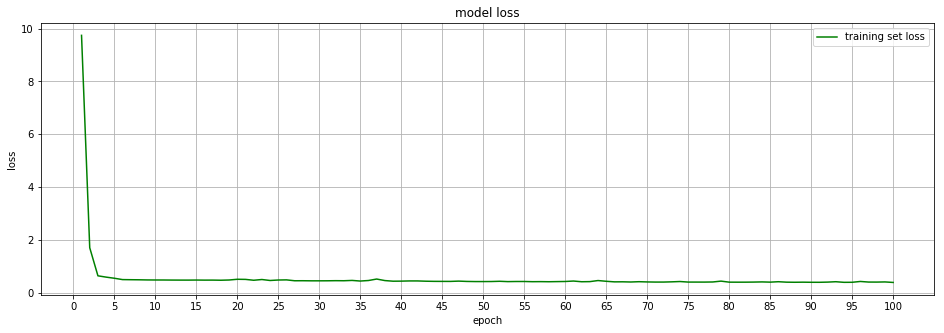

----------------------------- R2 Score ----------------------------------
The training R2 score is 0.600
The test R2 score is 0.591


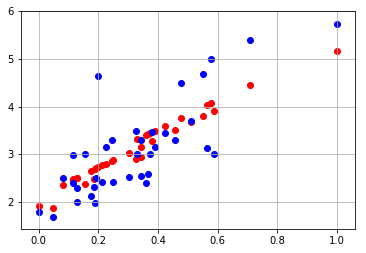

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

A = mm.fit_transform(X_train)
B = y_train/1e5
C = mm.transform(X_test)
D = y_test/1e5

opt = SGD(lr=0.1)
lossfunc = 'mean_squared_error'
epos = 100
CreateRunModel(A, B, C, D, opt, lossfunc, epos)

### try regularize

/Users/apalumbo/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


The initial weights W are: 
 [[ 0.2112608 ]
 [ 0.1553669 ]
 [ 0.88233507]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 2.83071208]
 [ 0.57158512]
 [-0.00292786]]
The resulted bias b is:  [ 1.76942897]
--------------------------- plot the loss function ------------------------------------


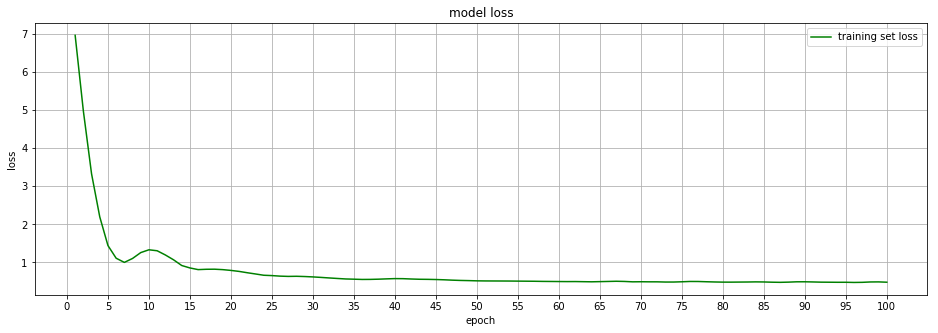

----------------------------- R2 Score ----------------------------------
The training R2 score is 0.590
The test R2 score is 0.527


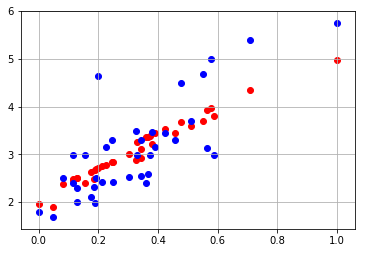

In [30]:
from keras.regularizers import l2
from keras.callbacks import CSVLogger

A = mm.fit_transform(X_train)
B = y_train/1e5
C = mm.transform(X_test)
D = y_test/1e5

opt = Adam(lr=0.1)
lossfunc = 'mean_squared_error'
epos = 100
reg = l2(0.01)
callback = [CSVLogger('traninglog.csv')]
CreateRunModel(A, B, C, D, opt, lossfunc, epos, reg, callback)

### add cross validation and early stopping

/Users/apalumbo/anaconda/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


The initial weights W are: 
 [[ 1.17141712]
 [-0.14564478]
 [-0.96869951]]
The initial bias b is:  [ 0.]
---------------------------------------------------------------
The resulted weights W are: 
 [[ 2.81309724]
 [ 0.68185323]
 [-0.18055494]]
The resulted bias b is:  [ 1.75994813]
--------------------------- plot the loss function ------------------------------------


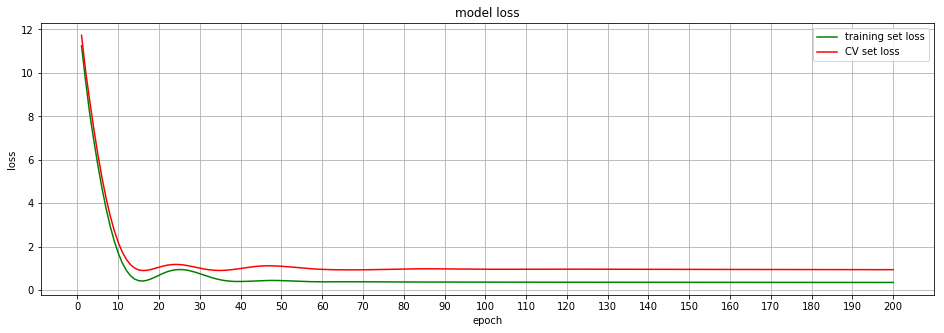

----------------------------- R2 Score ----------------------------------
The training R2 score is 0.583
The test R2 score is 0.506


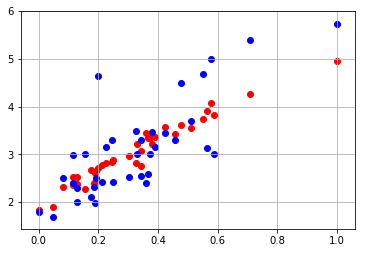

In [29]:
from keras.callbacks import EarlyStopping
A = mm.fit_transform(X_train)
B = y_train/1e5
C = mm.transform(X_test)
D = y_test/1e5

opt = Adam(lr=0.1)
lossfunc = 'mean_squared_error'
epos = 200
reg = l2(0.01)
cbacks = None
# cbacks = [EarlyStopping(min_delta=0.0001, patience=2)]
cvsplit = 0.2
CreateRunModel(A, B, C, D, opt, lossfunc, epos, reg, cbacks, cvsplit)